In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("datasets/international-airline-passengers.csv", usecols=[1], skipfooter=2)
dataset.tail()

<ipython-input-3-f9a7f8efa212>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dataset = pd.read_csv("datasets/international-airline-passengers.csv", usecols=[1], skipfooter=2)


,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,606
140,508
141,461
142,390
143,432


In [4]:
dataset = dataset.values.astype('float32')

In [5]:
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

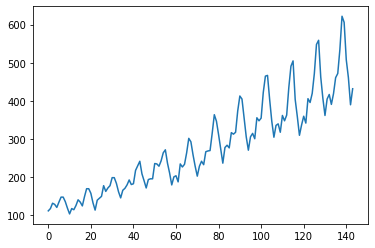

In [15]:
plt.plot(dataset)
plt.show()

In [8]:
train, test = dataset[:int(len(dataset)*0.67), :], dataset[int(len(dataset)*0.67):,:]
len(train), len(test), len(dataset)

(96, 48, 144)

In [10]:
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        X.append(dataset[i:i+look_back, 0])
        y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(y)

In [11]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
47/47 - 0s - loss: 132077.6406
Epoch 2/200
47/47 - 0s - loss: 114663.5234
Epoch 3/200
47/47 - 0s - loss: 100121.0078
Epoch 4/200
47/47 - 0s - loss: 86568.6953
Epoch 5/200
47/47 - 0s - loss: 73889.5781
Epoch 6/200
47/47 - 0s - loss: 61505.9141
Epoch 7/200
47/47 - 0s - loss: 49884.9570
Epoch 8/200
47/47 - 0s - loss: 38987.7695
Epoch 9/200
47/47 - 0s - loss: 29404.7441
Epoch 10/200
47/47 - 0s - loss: 21232.4980
Epoch 11/200
47/47 - 0s - loss: 14751.0527
Epoch 12/200
47/47 - 0s - loss: 9719.7109
Epoch 13/200
47/47 - 0s - loss: 6181.0737
Epoch 14/200
47/47 - 0s - loss: 3818.5554
Epoch 15/200
47/47 - 0s - loss: 2309.6394
Epoch 16/200
47/47 - 0s - loss: 1443.6259
Epoch 17/200
47/47 - 0s - loss: 971.5054
Epoch 18/200
47/47 - 0s - loss: 736.4515
Epoch 19/200
47/47 - 0s - loss: 619.5580
Epoch 20/200
47/47 - 0s - loss: 571.8817
Epoch 21/200
47/47 - 0s - loss: 550.4217
Epoch 22/200
47/47 - 0s - loss: 547.8838
Epoch 23/200
47/47 - 0s - loss: 537.3373
Epoch 24/200
47/47 - 0s - loss: 538.

Epoch 198/200
47/47 - 0s - loss: 541.8723
Epoch 199/200
47/47 - 0s - loss: 537.3341
Epoch 200/200
47/47 - 0s - loss: 536.4644


In [27]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( "Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( "Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))

Train Score: 531.02 MSE (23.04 RMSE)
Test Score: 2352.68 MSE (48.50 RMSE)


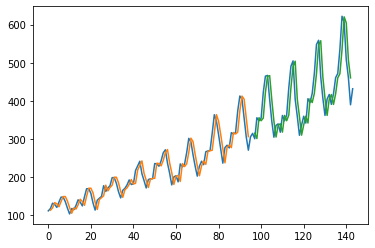

In [29]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [34]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( "Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( "Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))

Epoch 1/200
43/43 - 0s - loss: 31630.2852
Epoch 2/200
43/43 - 0s - loss: 7573.5913
Epoch 3/200
43/43 - 0s - loss: 1965.6635
Epoch 4/200
43/43 - 0s - loss: 1292.7114
Epoch 5/200
43/43 - 0s - loss: 1230.3457
Epoch 6/200
43/43 - 0s - loss: 1176.7211
Epoch 7/200
43/43 - 0s - loss: 1160.4138
Epoch 8/200
43/43 - 0s - loss: 1144.3693
Epoch 9/200
43/43 - 0s - loss: 1146.3861
Epoch 10/200
43/43 - 0s - loss: 1166.8152
Epoch 11/200
43/43 - 0s - loss: 1131.7375
Epoch 12/200
43/43 - 0s - loss: 1124.5582
Epoch 13/200
43/43 - 0s - loss: 1124.9749
Epoch 14/200
43/43 - 0s - loss: 1114.8641
Epoch 15/200
43/43 - 0s - loss: 1112.4415
Epoch 16/200
43/43 - 0s - loss: 1118.1300
Epoch 17/200
43/43 - 0s - loss: 1098.0681
Epoch 18/200
43/43 - 0s - loss: 1100.2170
Epoch 19/200
43/43 - 0s - loss: 1127.7163
Epoch 20/200
43/43 - 0s - loss: 1087.7751
Epoch 21/200
43/43 - 0s - loss: 1089.9247
Epoch 22/200
43/43 - 0s - loss: 1081.0277
Epoch 23/200
43/43 - 0s - loss: 1060.9432
Epoch 24/200
43/43 - 0s - loss: 1052.2089


Epoch 198/200
43/43 - 0s - loss: 492.6405
Epoch 199/200
43/43 - 0s - loss: 491.6308
Epoch 200/200
43/43 - 0s - loss: 483.9437
Train Score: 455.23 MSE (21.34 RMSE)
Test Score: 1971.05 MSE (44.40 RMSE)


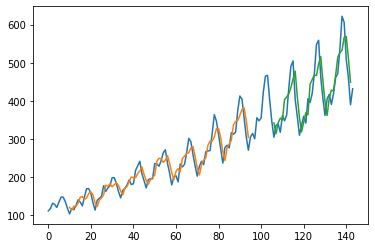

In [35]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()